In [2]:
# Simulation / bootstrapping and Fixed Effects

In [140]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import root_mean_squared_error

## Fixed Effects

In [141]:
scipy.stats.norm.rvs(0, 1, (5,))

array([ 0.58251298,  1.2070791 , -0.75072196, -0.12903591,  0.424848  ])

In [142]:
num = 1000
X1 = scipy.stats.norm.rvs(0, 1, (num,))
X2 = scipy.stats.norm.rvs(0, 1, (num,))
X3 = scipy.stats.norm.rvs(0, 1, (num,))
Y1 = 3 * X1 + 5 + scipy.stats.norm.rvs(0, 1, (num,))
Y2 = 3 * X2 + 10 + scipy.stats.norm.rvs(0, 1, (num,))
Y3 = 3 * X3 + 15 + scipy.stats.norm.rvs(0, 1, (num,))

In [143]:
results = sm.OLS(Y1, sm.add_constant(X1)).fit()

In [144]:
results.params

array([4.98114029, 3.04761568])

In [145]:
results.bse

array([0.03222661, 0.03325326])

In [146]:
results.rsquared

0.8938012371044817

In [148]:
np.std(results.resid)

1.0180234084020547

In [149]:
np.std(results.resid) # (resid_0 - resid_mean)^2 + (resid_1 - resid_mean)^2 + ....

1.0180234084020547

In [150]:
root_mean_squared_error(Y1, results.predict(sm.add_constant(X1))) # Another way
# (resid_0)^2 + (resid_1)^2 + ....

1.0180234084020547

In [151]:
results.resid.mean()

-7.993605777301127e-16

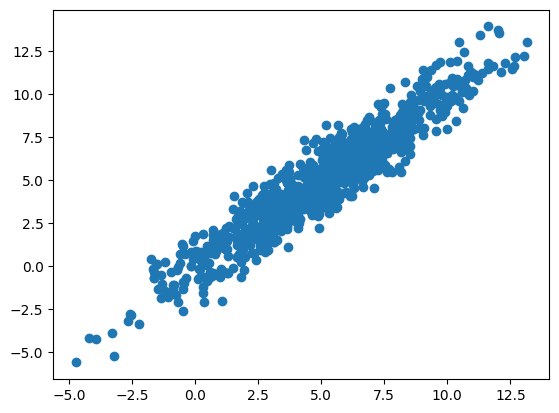

In [109]:
plt.scatter(results.predict(sm.add_constant(X1)), Y1)

In [152]:
Y = np.hstack((Y1, Y2, Y3))
X = np.hstack((X1, X2, X3))
results_combined = sm.OLS(Y, sm.add_constant(X)).fit()
results_combined.params # note that params do not match group 1, but likely will match group 2

array([10.01695611,  3.03273586])

In [153]:
results_combined.bse

array([0.07709793, 0.07760093])

In [154]:
results_combined.rsquared # rsquared is _worse_ than for group 1 alone

0.33750811186669405

In [155]:
np.std(results_combined.resid)

4.221295549100452

In [156]:
root_mean_squared_error(Y, results_combined.predict(sm.add_constant(X))) # another way

4.221295549100452

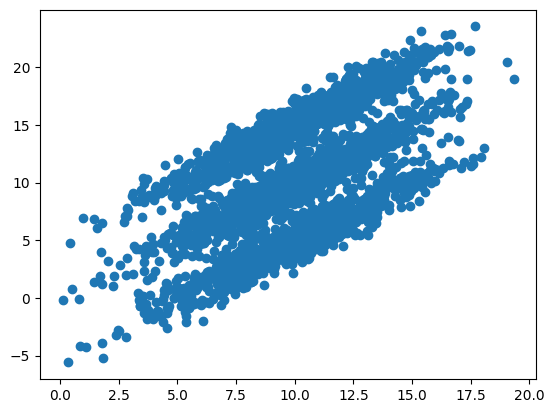

In [115]:
plt.scatter(results_combined.predict(sm.add_constant(X)), Y)

In [161]:
pd.get_dummies(np.repeat([0, 1, 2], 5), drop_first = True)

,1,2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,True,False
6,True,False
7,True,False
8,True,False
9,True,False


In [162]:
groups = np.repeat([0, 1, 2], num)
X_fixed_effects = pd.get_dummies(groups, drop_first=True)
X_design = np.hstack((X.reshape(-1, 1), X_fixed_effects))
df_design = pd.DataFrame(X_design, columns = ["X", "Group_1", "Group_2"])
results_fixed_effects = sm.OLS(Y, sm.add_constant(df_design)).fit()

In [163]:
results_fixed_effects.params

const       4.980840
X           3.016983
Group_1     5.059248
Group_2    10.048739
dtype: float64

In [164]:
results_fixed_effects.bse

const      0.031482
X          0.018295
Group_1    0.044522
Group_2    0.044522
dtype: float64

In [165]:
results_fixed_effects.rsquared

0.9632015565953987

In [166]:
np.std(results_fixed_effects.resid)

0.9948788571000419

In [167]:
root_mean_squared_error(Y, results_fixed_effects.predict(sm.add_constant(df_design)))

0.9948788571000419

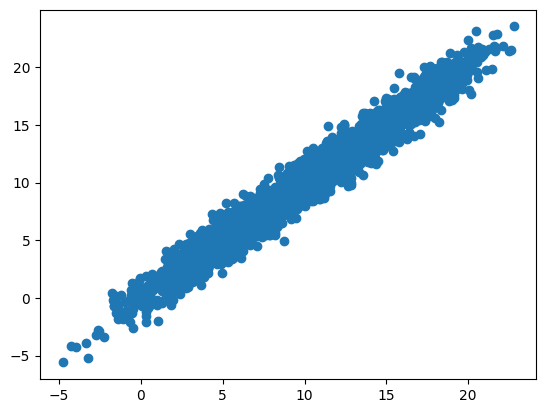

In [121]:
plt.scatter(results_fixed_effects.predict(sm.add_constant(df_design)), Y)

In [169]:
X = np.hstack((X1 - X1.mean(), X2 - X2.mean(), X3 - X3.mean()))
Y = np.hstack((Y1 - Y1.mean(), Y2 - Y2.mean(), Y3 - Y3.mean()))
results_demeaned = sm.OLS(Y, X).fit()

In [170]:
results_demeaned.rsquared

0.9007594102829641

In [171]:
np.std(results_demeaned.resid)

0.9948788571000419

In [172]:
root_mean_squared_error(Y, results_demeaned.predict(X))

0.9948788571000419

# Simulation

In [173]:
# Suppose we want to know what happens if we do this simulation many times
num_iter = 1000
beta_1_list = list()
se_list = list()
for n in range(num_iter):
    num = 1000
    X1 = scipy.stats.norm.rvs(0, 1, (num,))
    X2 = scipy.stats.norm.rvs(0, 1, (num,))
    X3 = scipy.stats.norm.rvs(0, 1, (num,))
    Y1 = 3 * X1 + 5 + scipy.stats.norm.rvs(0, 1, (num,))
    Y2 = 3 * X2 + 10 + scipy.stats.norm.rvs(0, 1, (num,))
    Y3 = 3 * X3 + 15 + scipy.stats.norm.rvs(0, 1, (num,))
    X = np.hstack((X1 - X1.mean(), X2 - X2.mean(), X3 - X3.mean())) # demean the data
    Y = np.hstack((Y1 - Y1.mean(), Y2 - Y2.mean(), Y3 - Y3.mean()))
    results_demeaned = sm.OLS(Y, X).fit()
    beta_1_list.append(results_demeaned.params[0])
    se_list.append(results_demeaned.bse[0])

np.std(beta_1_list)

0.018610001927397465

In [175]:
np.std(beta_1_list), np.mean(beta_1_list)

(0.018610001927397465, 2.9999760024840634)

In [176]:
np.std(se_list), np.mean(se_list)

(0.00032683201635459535, 0.018252704528099024)

In [137]:
np.mean(beta_1_list)

3.0011668893443586

(array([  2.,   5.,  10.,  25.,  35.,  64., 101., 102., 128., 147., 122.,
         87.,  81.,  40.,  26.,  12.,   5.,   5.,   2.,   1.]),
 array([2.94231976, 2.94860986, 2.95489996, 2.96119006, 2.96748016,
        2.97377026, 2.98006036, 2.98635046, 2.99264056, 2.99893066,
        3.00522076, 3.01151086, 3.01780096, 3.02409106, 3.03038116,
        3.03667126, 3.04296136, 3.04925146, 3.05554156, 3.06183166,
        3.06812176]),
 <BarContainer object of 20 artists>)

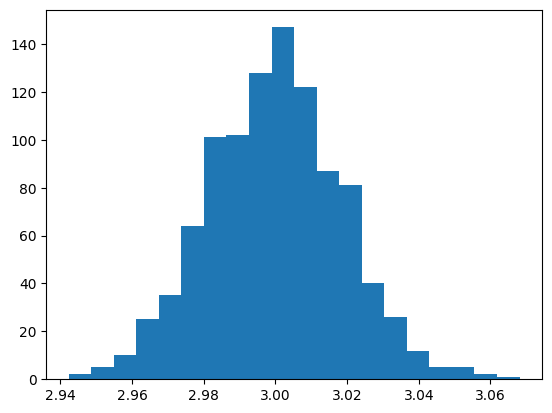

In [177]:
plt.hist(beta_1_list, bins = 20)

(array([  5.,   8.,  11.,  17.,  29.,  37.,  45.,  93.,  97.,  88.,  98.,
        125.,  98.,  72.,  69.,  48.,  20.,  22.,   8.,  10.]),
 array([0.01729983, 0.01739014, 0.01748046, 0.01757078, 0.0176611 ,
        0.01775142, 0.01784174, 0.01793205, 0.01802237, 0.01811269,
        0.01820301, 0.01829333, 0.01838365, 0.01847396, 0.01856428,
        0.0186546 , 0.01874492, 0.01883524, 0.01892556, 0.01901587,
        0.01910619]),
 <BarContainer object of 20 artists>)

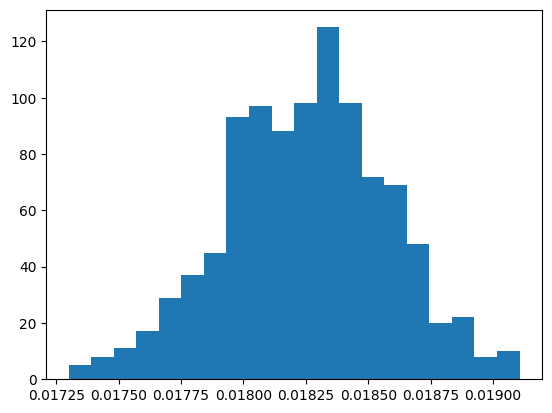

In [179]:
plt.hist(se_list, bins = 20)